In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/Data/skin cancer detection/melanoma_cancer_dataset/train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/Data/skin cancer detection/melanoma_cancer_dataset/train')


In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)


9615
9615


In [6]:
batch_size = 32
img_height = 180
img_width = 180


In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='training',
    image_size=(img_height, img_width),  
    batch_size=batch_size)


Found 9615 files belonging to 2 classes.
Using 7692 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='validation',
    image_size=(img_height, img_width),  
    batch_size=batch_size)

Found 9615 files belonging to 2 classes.
Using 1923 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)


['benign', 'malignant']


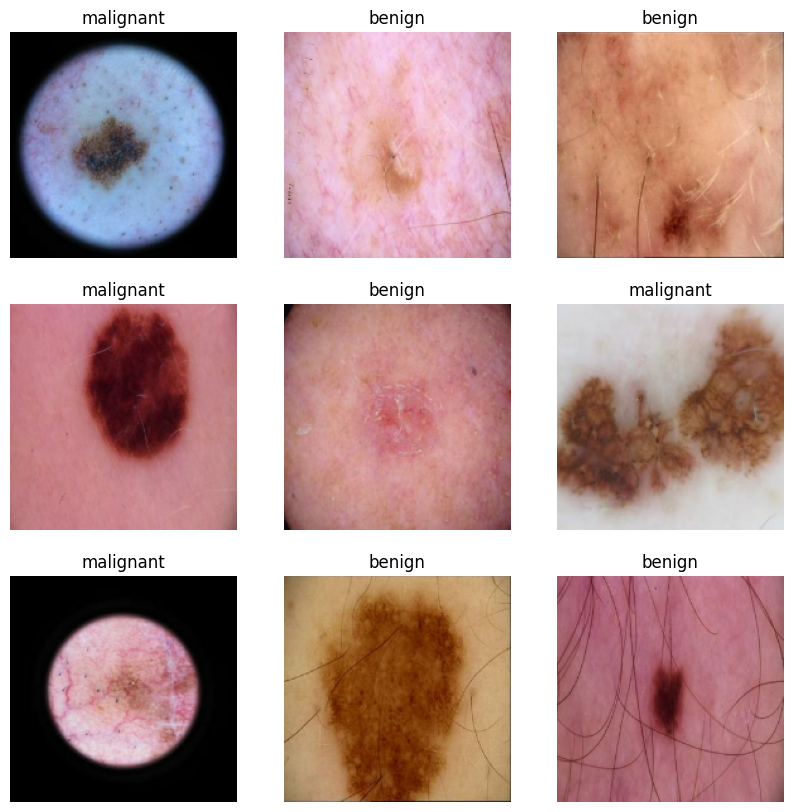

In [ ]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [10]:
num_classes = 9 # As target class has 9 labels

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [12]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/10
241/241 [==============================] - 223s 927ms/step - loss: 0.1405 - accuracy: 0.9436 - val_loss: 0.3104 - val_accuracy: 0.9059
Epoch 2/10
241/241 [==============================] - 208s 862ms/step - loss: 0.1316 - accuracy: 0.9501 - val_loss: 0.2719 - val_accuracy: 0.9080
Epoch 3/10
241/241 [==============================] - 207s 861ms/step - loss: 0.1141 - accuracy: 0.9575 - val_loss: 0.2785 - val_accuracy: 0.9038
Epoch 4/10
241/241 [==============================] - 212s 880ms/step - loss: 0.0999 - accuracy: 0.9620 - val_loss: 0.3166 - val_accuracy: 0.9048
Epoch 5/10
241/241 [==============================] - 211s 876ms/step - loss: 0.0825 - accuracy: 0.9685 - val_loss: 0.3024 - val_accuracy: 0.9033
Epoch 6/10
241/241 [==============================] - 213s 886ms/step - loss: 0.0718 - accuracy: 0.9731 - val_loss: 0.3134 - val_accuracy: 0.9090
Epoch 7/10
241/241 [==============================] - 217s 901ms/step - loss: 0.0672 - accuracy: 0.9765 - val_loss: 0.3268 -

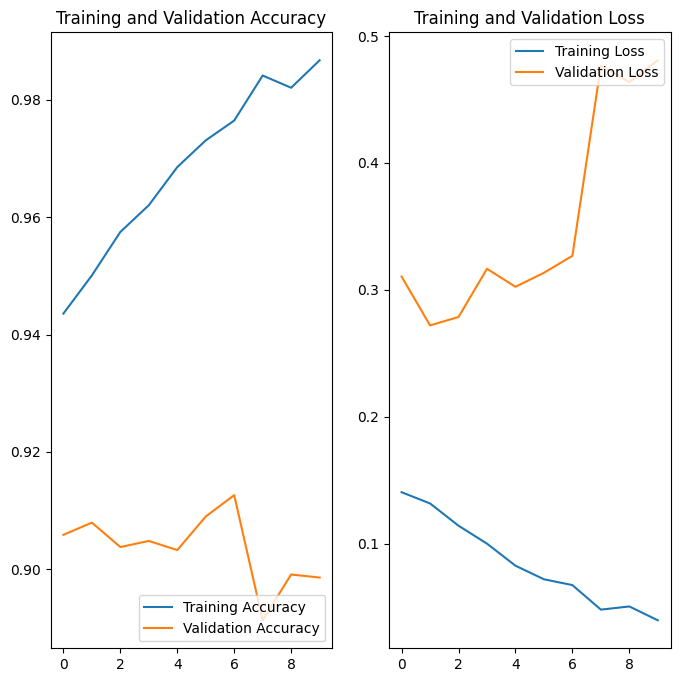

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [13]:
data_augmentation = keras.Sequential([
                                      layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
                                      layers.experimental.preprocessing.RandomRotation(0.1),
                                      layers.experimental.preprocessing.RandomZoom(0.1),
])


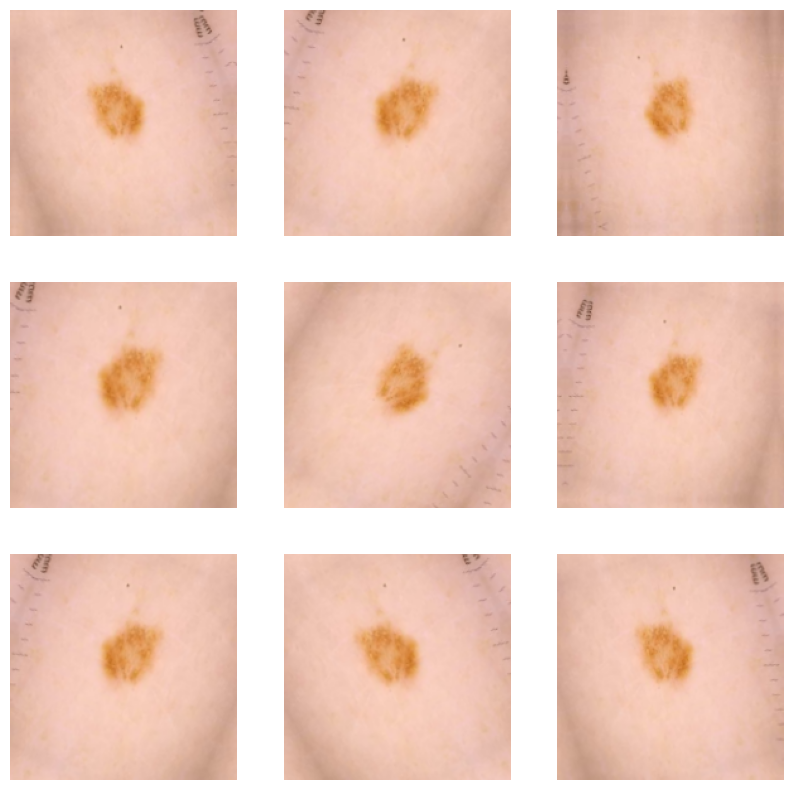

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")


In [14]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
epochs = 25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/25
241/241 [==============================] - 1614s 3s/step - loss: 0.4590 - accuracy: 0.7858 - val_loss: 0.3385 - val_accuracy: 0.8508
Epoch 2/25
241/241 [==============================] - 450s 2s/step - loss: 0.3415 - accuracy: 0.8539 - val_loss: 0.3174 - val_accuracy: 0.8648
Epoch 3/25
241/241 [==============================] - 452s 2s/step - loss: 0.3153 - accuracy: 0.8651 - val_loss: 0.2618 - val_accuracy: 0.8840
Epoch 4/25
241/241 [==============================] - 453s 2s/step - loss: 0.2913 - accuracy: 0.8768 - val_loss: 0.2496 - val_accuracy: 0.8882
Epoch 5/25
241/241 [==============================] - 453s 2s/step - loss: 0.2789 - accuracy: 0.8848 - val_loss: 0.2512 - val_accuracy: 0.8934
Epoch 6/25
229/241 [===========================>..] - ETA: 20s - loss: 0.2794 - accuracy: 0.8794

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
from glob import glob
path_list = [ x for x in glob(os.path.join(data_dir_train, '*', '*.jpg')) ] 
lesion_list = [ os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg')) ]
print(len(lesion_list))


In [ ]:
df_dict_original = dict(zip(path_list, lesion_list))
print(list(df_dict_original.items())[:2])


In [ ]:
original_df = pd.DataFrame(list(df_dict_original.items()), columns=['Path','Label'])
original_df.head()


In [ ]:
original_df[['Label']].value_counts()


In [ ]:
original_df[['Label']].value_counts(normalize=True)


In [ ]:
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(model,f)